# Computer Homework 6: Numerical solutions to $RC$ circuits
### Scroll down to find Homework 7
Most simple circuits can be solved using a variety of techniques.  As circuits become more complicated, or as the signals the circuits are processing become more complicated, finding an exact solution can become more difficult.  

We learned in class that
\begin{equation}
I = \frac {dQ} {dt}
\end{equation}

This simple definition implies that many circuits can be expressed in the language of differential equations. The purpose of this assignment is to learn how to solve these equations numerically. 

Consider a first-order equations of the form:
\begin{equation}
\frac {dx} {dt} = f(x,t).
\end{equation}

The solution to this equation is a function $x(t)$ whose first derivative is $f$.
To find the solution to such an equation, we also need boundary conditions, or starting points.  Suppose that we have a first-order differential equation and know the value of $x$ for some specific time $t$, that is we know $x(t)$.  The we can write the value of x some short time later as
\begin{equation}
x(t+h) = x(t) + h \frac {dx} {dt} + \frac 1 2 h^2 \frac {d^2x} {dt^2} + ...
\end{equation}

\begin{equation}
x(t+h) = x(t) + h f(x,t) + h^2 \frac {df(x,t)} {dt} + ...
\end{equation}

If $h$ is small then $h^2$ is really small, and we can ignore it, and all higher terms of $h^n$.  This technique is called Euler's method.

Using this, if we know the value of $x$ at some time $t$ we can find the value at some short time later.  We can then repeat this process and understand how $x$ changes over time. The set of $x$ values at a discrete set of $t$ values is the numerical solution to our differential equation.

We are going to use this method to find the current, voltages and charges in simple circuits.  We will start with circuits which are easy to solve analytically so we can verify the numerical solution. Later we'll consider circuits that are a little more difficult.


## Import the usual libraries

In [1]:
import numpy as np                         ## numpy is a library that inclues most of the numerical funciton you will need
import matplotlib.pyplot as plt            ## this is the library we use to plot

## Example from Mechanics: the Simple Harmonic Oscillator

To illustrate these ideas, let's work out the solution to a situation with which you are already familiar: the simple harmonic oscillator, e.g. a mass on a spring:
<img src="http://www-personal.umich.edu/~gerdes/img/SHO.png" height="300" align="center">
This system is described by Newton's second law:
$$
    F = ma = m\frac{d^2x}{dt^2}= -kx.
$$

This is a second-order differential equation (it relates the function $x(t)$ to its second derivative), so we need to specify two boundary conditions. In mechanics, boundary conditions are often the initial position and velocity. 

Let's suppose that the mass starts from rest at $x=1$. We know that the solution to Newton's second law is
\begin{eqnarray}
        x(t)& = & A\cos\omega t \\
        v(t) & = &-A\omega\sin\omega t \\
        a(t)& = &-A\omega^2\cos\omega t,
\end{eqnarray}
where $\omega = \sqrt{k/m}$, and in this case $A=1$.

In discrete form, our equations look like:
$$
    \Delta v = a\Delta t,
$$
$$
    \Delta x = v\Delta t.
$$

Then we can proceed as follows:

In [6]:
# Specify the mass and spring constant. 
m = 1
k = 1

# Initial position and velocity.
x = 1
v = 0

# We already "know" that this is the answer, so let's integrate for several periods,
# and choose a time step that's small compared to the period.
omega = np.sqrt(k/m)
T = 2*np.pi/omega      # Period in terms of angular frequency
dt = T/100             # time step = 1/100 of a period.
times = np.arange(0, 5*T, dt)   # Integrate for 5 periods, in steps of dt.
Ntimes = len(times)  # total number of times we'll consider
#
# These arrays will hold the values of x, v, and a at each time step.
xarray = np.zeros(Ntimes)
varray = np.zeros(Ntimes)
aarray = np.zeros(Ntimes)
# 
# Main loop:
for i in range(Ntimes):
    a = -k*x/m     - 0.5*v**3 # damping
    xarray[i] = x      # store the current values of x, v, and a at this time point.
    varray[i] = v
    aarray[i] = a
    dv = a*dt      # change in velocity over time dt
    v += dv        # update v at next time step
    dx = v*dt      # change in position over time dt
    x += dx        # update x at next time step

Now we can plot our results for $x$, $v$, and $a$. Do the results look like what you expect?

Text(0.5,0,'Time in units of period')

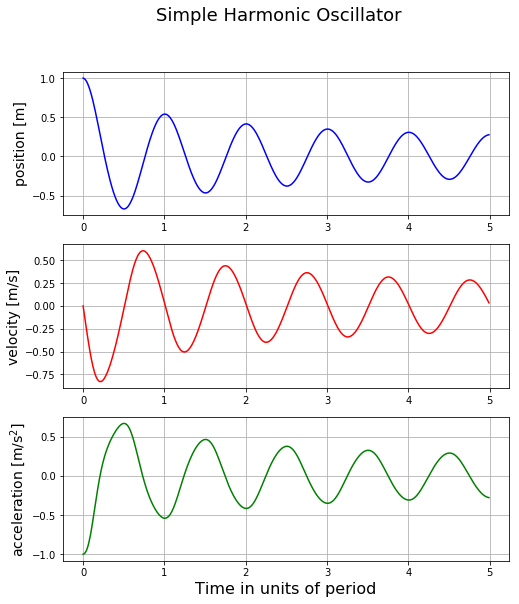

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,9))
fig.suptitle('Simple Harmonic Oscillator', fontsize=18)
ax1.plot(times/T, xarray, color='b')
ax1.grid()
ax1.set_ylabel('position [m]', fontsize=14)
ax2.plot(times/T, varray, color='r')
ax2.grid()
ax2.set_ylabel('velocity [m/s]', fontsize=14)
ax3.plot(times/T, aarray, color='g')
ax3.grid()
ax3.set_ylabel('acceleration [m/s$^2$]', fontsize=14)
ax3.set_xlabel('Time in units of period', fontsize=16)

## Your assignment

Apply these techniques to calculate the currents and voltages in circuits with a resistor, capacitor and voltage source.  The voltage and current through a resistor is given by $V=IR$, the voltage across a capacitor is given by $V=Q/C$ and the voltage from a battery is just $V$.

### Part 1 (15 points) Calculate the discharge of a capacitor through a resistor.
The capacitor will have some initial charge $Q$.  The rate of discharge will be the current through the capacitor $\frac {dQ} {dt}$.  
<img src="http://www-personal.umich.edu/~gerdes/img/MC-PythonCircuit01.png" height="400" width="400">
Setup three one-dimensional arrays, one for the time, one for the current in the circuit and one for the charge on the capacitor.  Since the current in the capacitor must be the same as the current in the resistor, we have
\begin{equation}
\frac {dQ} {dt} = I = \frac V R
\end{equation}
and
\begin{equation}
 V = \frac Q C
\end{equation}


Thus, we have our simple first order differential equation
\begin{equation}
\frac {dQ} {dt} = \frac Q {RC}
\end{equation}

Turning this into a discrete expression, we get 
\begin{equation}
\Delta Q = \frac Q {RC} \Delta t
\end{equation}

So, choose values for $R$, $C$ and the initial charge $Q$.  Then pick an appropriate time step $\Delta t$.  For each time step calculate the change in charge, $\Delta Q$, and the corresponding current through the resistor and total charge on the capacitor.  Then subtract this $\Delta Q$ from the charge on the capacitor and repeat the process.

* Plot the current through the resistor and the charge on the capacitor as a function of time. Try making your plots on both a linear and a semilogy scale to verify that the behavior is exponential.

* Use your program to compute the total amount of energy dissipated in the resistor, and show that it's equal to the initial stored energy in the capacitor. 


In [ ]:
# Your code goes here.

Write your explanation here. Be sure to discuss the agreement of your solution with the analytic solution, and explain why the time step you chose is adequate. 

### Part 2 (15 points) Calculate the charge on a capacitor from a battery through a resistor.
This is very similar to Part 1 - essentially only the boundary conditions have changed.  
<img src="http://www-personal.umich.edu/~gerdes/img/MC-PythonCircuit02.png" height="400" width="400">
The capacitor will start with no charge on the plates, and it will be charged from the battery.  The inital voltage across the capacitor is then zero, and the initial current through the resistor will be $I = \frac {V_b} {R}$ where $V_b$ is the voltage of the battery.

* Write down the differential equation which includes this initial condition, and solve numerically.  Plot the current through the resistor and the charge on the capacitor as a function of time.

* Compute and plot the power delivered by the battery to the circuit as a function of time. When is the battery delivering the most power to the circuit?

* Compute the total energy delivered by the battery to the circuit. What fraction of this energy is stored in the capacitor, and what fraction is dissipated as heat in the resistor? Does your answer to the last question depend on the values of $R$ and $C$?


In [18]:
## your code goes here

Write your explanation and comments here.

### Part 3 (10 pts) Essay question

You have now solved a simple first order differential equation both analytically and numerically.  Which is easier?  What are the advantages and disadvantages of each method?


# Computer Homework 7: A more complex circuit
### This assignment is due Thursday 10/25 at 10am.

In the problems above, you considered a simple $RC$ circuit. Now consider something a little more complicated:
<img src="http://www-personal.umich.edu/~gerdes/img/RC_1.jpg" height="400" width="400">

You've solved this circuit analytically as a written homework problem, and determined the time constant for charging the capacitor. Your task now is to model this circuit numerically using the same techniques as you employed for the simple $RC$ circuit above. Assume the values of the components are all known (we'll specify exact values soon), and that the capacitor is uncharged at $t=0$. Your goal is to find the charge $Q$ on the capacitor, and the three currents $I_1$, $I_2$, and $I_3$, as a function of time.  

<b>Part 1 (5 points):</b> Use Kirchhoff's rules to write down four linearly independent equations involving the three unknowns $Q$, $I_1$, $I_2$, and $I_3$. You should already have done this on your written homework. Enter them in LaTeX format by modifying the cell below. (I've put some LaTeX tips in the comments in the next cell, and I put a longer discussion of LaTeX on Piazza.)

\begin{eqnarray}
     a + b & = & c   \\     % this is a comment. The \\ tells LaTeX to start a new line. 
     x + y & = & z   \\
     \frac{1}{2} + \frac{1}{3} & = & \frac{5}{6} \\ % This is how you enter fractions. 
     E & = & mc^2  % 
\end{eqnarray} 

<b>Part 2 (10 points):</b> Specify your initial conditions. Assuming that the capacitor is initially uncharged, and the battery
is connected at $t=0$, what are the initial values of $I_1$, $I_2$, $I_3$, and $Q$?

Enter your answer here. 

<b>Step 3 (15 points):</b> Solve the circuit. Write down a loop over time similar to what you did for the simple circuit in the previous assignment, and update the values of each unknown quantity at each step according to the equations you wrote down in Step 1. 

To do this, you'll need to choose some specific values for the components, so let's pick:
* $V = 10$ V
* $R_1 = 10~\Omega$
* $R_2 = 20~\Omega$
* $R_3 = 15~\Omega$
* $C = 1.0~\mu$F

Full credit for making the following plots:
* $I_1$, $I_2$, and $I_3$ vs. time
* Voltage on $C$ vs. time

In [1]:
# Your code and explanations go here.

<b>Part 4 (10 points): Reflections and Sanity Checks</b>
* Calculate (analytically) the voltage on the capacitor after a long time. Does your numerical result agree with the calculation?
* Pick any loop in the circuit. Is the loop rule satisfied at all times for this loop?
* What is the time constant for charging the capacitor as calculated by your program? Does it agree with the result you obtained analytically?

Your explanations and plots go here.